### Overfit 발생 모델

In [1]:
%autosave 0
import numpy as np
import pandas as pd
import seaborn as sb

from tensorflow.keras.models import Sequential      # class
from tensorflow.keras.models import load_model      # model 사용
from tensorflow.keras.layers import Dense           # 전결합
from tensorflow.keras.layers import Dropout         # 노드의 비활성화
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras import regularizers   # L1, L2 규제 적용

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold  # K 겹 교차 검증
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

Autosave disabled


In [2]:
data = np.loadtxt('./Survival.csv', delimiter=",", dtype=np.float64)
# 사망자 삭제를 통한 생존자 비율 조정
# data = np.loadtxt('./Survival2.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(470, 18)


In [3]:
X = data[:, 0:17] # 0 ~ 16: 17개
print(X.shape)
Y = data[:, 17]   # 17: 1개
print(Y.shape)

(470, 17)
(470,)


In [4]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
seed = 0
# 90%: 분할대기(x_train_all), 10%: 테스트(x_test)
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                          stratify=Y,
                                                          test_size=0.1,
                                                          random_state=seed)
# 약한 Overfit
# 나머지 데이터 90%를 분할, 70%: 훈련(x_train), 30%: 검증(x_val)

# 강한 Overfit 
# 나머지 데이터 90%를 분할, 90%: 훈련(x_train), 10%: 검증(x_val)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

print(y_val[0:100])
print(y_val.shape)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(43,)


In [5]:
model = Sequential()
# model.add(Dense(128, input_dim=17, activation='linear')) # 첫번째 은닉층
model.add(Dense(128, input_shape=(17, ), activation='relu')) # 첫번째 은닉층
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층, 입력: 15, 출력 1

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# 최소 오차 20번 나오면 자동 종료
early_stopping = EarlyStopping(monitor='loss', patience=20)

# 학습
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                 epochs=1000, 
                 batch_size=2, callbacks=[early_stopping])

Train on 380 samples, validate on 43 samples
Epoch 1/1000
380/380 [==============================] - 2s 6ms/sample - loss: 0.6749 - accuracy: 0.8053 - val_loss: 0.5031 - val_accuracy: 0.7907
Epoch 2/1000
380/380 [==============================] - 0s 728us/sample - loss: 0.5141 - accuracy: 0.8342 - val_loss: 0.4337 - val_accuracy: 0.8605
Epoch 3/1000
380/380 [==============================] - 0s 663us/sample - loss: 0.4624 - accuracy: 0.8395 - val_loss: 0.5034 - val_accuracy: 0.8605
Epoch 4/1000
380/380 [==============================] - 0s 695us/sample - loss: 0.4653 - accuracy: 0.8474 - val_loss: 0.4630 - val_accuracy: 0.8605
Epoch 5/1000
380/380 [==============================] - 0s 682us/sample - loss: 0.4368 - accuracy: 0.8500 - val_loss: 0.4596 - val_accuracy: 0.8605
Epoch 6/1000
380/380 [==============================] - 0s 673us/sample - loss: 0.4549 - accuracy: 0.8395 - val_loss: 0.4214 - val_accuracy: 0.8605
Epoch 7/1000
380/380 [==============================] - 0s 649us/samp

Epoch 56/1000
380/380 [==============================] - 0s 729us/sample - loss: 0.4057 - accuracy: 0.8474 - val_loss: 0.4437 - val_accuracy: 0.8605
Epoch 57/1000
380/380 [==============================] - 0s 771us/sample - loss: 0.4201 - accuracy: 0.8500 - val_loss: 0.4446 - val_accuracy: 0.8605
Epoch 58/1000
380/380 [==============================] - 0s 1ms/sample - loss: 0.4106 - accuracy: 0.8500 - val_loss: 0.4277 - val_accuracy: 0.8605
Epoch 59/1000
380/380 [==============================] - 0s 713us/sample - loss: 0.4041 - accuracy: 0.8447 - val_loss: 0.4449 - val_accuracy: 0.8605
Epoch 60/1000
380/380 [==============================] - 0s 664us/sample - loss: 0.4132 - accuracy: 0.8500 - val_loss: 0.4438 - val_accuracy: 0.8605
Epoch 61/1000
380/380 [==============================] - 0s 639us/sample - loss: 0.4086 - accuracy: 0.8500 - val_loss: 0.4327 - val_accuracy: 0.8605
Epoch 62/1000
380/380 [==============================] - 0s 717us/sample - loss: 0.4079 - accuracy: 0.8500 -

Epoch 111/1000
380/380 [==============================] - 0s 667us/sample - loss: 0.3638 - accuracy: 0.8684 - val_loss: 0.5492 - val_accuracy: 0.7907
Epoch 112/1000
380/380 [==============================] - 0s 672us/sample - loss: 0.3584 - accuracy: 0.8684 - val_loss: 0.5136 - val_accuracy: 0.8140
Epoch 113/1000
380/380 [==============================] - 0s 690us/sample - loss: 0.3497 - accuracy: 0.8763 - val_loss: 0.7276 - val_accuracy: 0.7442
Epoch 114/1000
380/380 [==============================] - 0s 673us/sample - loss: 0.3477 - accuracy: 0.8711 - val_loss: 0.4935 - val_accuracy: 0.8372
Epoch 115/1000
380/380 [==============================] - 0s 669us/sample - loss: 0.3483 - accuracy: 0.8763 - val_loss: 0.5104 - val_accuracy: 0.8372
Epoch 116/1000
380/380 [==============================] - 0s 672us/sample - loss: 0.3704 - accuracy: 0.8711 - val_loss: 0.6573 - val_accuracy: 0.7442
Epoch 117/1000
380/380 [==============================] - 0s 687us/sample - loss: 0.3505 - accuracy:

380/380 [==============================] - 0s 665us/sample - loss: 0.3239 - accuracy: 0.8842 - val_loss: 0.8201 - val_accuracy: 0.7442
Epoch 166/1000
380/380 [==============================] - 0s 698us/sample - loss: 0.3260 - accuracy: 0.8711 - val_loss: 0.4808 - val_accuracy: 0.8140
Epoch 167/1000
380/380 [==============================] - 0s 672us/sample - loss: 0.3092 - accuracy: 0.8816 - val_loss: 0.8374 - val_accuracy: 0.7442
Epoch 168/1000
380/380 [==============================] - 0s 666us/sample - loss: 0.3130 - accuracy: 0.8789 - val_loss: 0.5019 - val_accuracy: 0.8140
Epoch 169/1000
380/380 [==============================] - 0s 681us/sample - loss: 0.3471 - accuracy: 0.8737 - val_loss: 0.6211 - val_accuracy: 0.7442
Epoch 170/1000
380/380 [==============================] - 0s 677us/sample - loss: 0.3079 - accuracy: 0.8816 - val_loss: 0.5100 - val_accuracy: 0.7674
Epoch 171/1000
380/380 [==============================] - 0s 675us/sample - loss: 0.3130 - accuracy: 0.8789 - val_l

In [8]:
# 과적합을 줄이기 위해 네트워크를 단순화
model = Sequential()
# model.add(Dense(128, input_dim=17, activation='linear')) # 첫번째 은닉층
model.add(Dense(80, input_shape=(17, ), activation='relu')) # 첫번째 은닉층
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층, 입력: 15, 출력 1

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# 최소 오차 20번 나오면 자동 종료
early_stopping = EarlyStopping(monitor='loss', patience=20)

# 학습
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                 epochs=1000, 
                 batch_size=2, callbacks=[early_stopping])

Train on 380 samples, validate on 43 samples
Epoch 1/1000
380/380 [==============================] - 1s 2ms/sample - loss: 0.7102 - accuracy: 0.7921 - val_loss: 0.4342 - val_accuracy: 0.8605
Epoch 2/1000
380/380 [==============================] - 0s 715us/sample - loss: 0.4322 - accuracy: 0.8500 - val_loss: 0.4255 - val_accuracy: 0.8605
Epoch 3/1000
380/380 [==============================] - 0s 731us/sample - loss: 0.4413 - accuracy: 0.8500 - val_loss: 0.4419 - val_accuracy: 0.8605
Epoch 4/1000
380/380 [==============================] - 0s 670us/sample - loss: 0.4347 - accuracy: 0.8500 - val_loss: 0.4250 - val_accuracy: 0.8605
Epoch 5/1000
380/380 [==============================] - 0s 692us/sample - loss: 0.4311 - accuracy: 0.8500 - val_loss: 0.4308 - val_accuracy: 0.8605
Epoch 6/1000
380/380 [==============================] - 0s 681us/sample - loss: 0.4355 - accuracy: 0.8500 - val_loss: 0.4312 - val_accuracy: 0.8605
Epoch 7/1000
380/380 [==============================] - 0s 674us/samp

Epoch 56/1000
380/380 [==============================] - 0s 661us/sample - loss: 0.4097 - accuracy: 0.8447 - val_loss: 0.4346 - val_accuracy: 0.8605
Epoch 57/1000
380/380 [==============================] - 0s 631us/sample - loss: 0.4100 - accuracy: 0.8500 - val_loss: 0.4217 - val_accuracy: 0.8605
Epoch 58/1000
380/380 [==============================] - 0s 702us/sample - loss: 0.4141 - accuracy: 0.8500 - val_loss: 0.4297 - val_accuracy: 0.8605
Epoch 59/1000
380/380 [==============================] - 0s 694us/sample - loss: 0.4118 - accuracy: 0.8500 - val_loss: 0.4212 - val_accuracy: 0.8605
Epoch 60/1000
380/380 [==============================] - 0s 675us/sample - loss: 0.4094 - accuracy: 0.8500 - val_loss: 0.4240 - val_accuracy: 0.8605
Epoch 61/1000
380/380 [==============================] - 0s 674us/sample - loss: 0.4083 - accuracy: 0.8500 - val_loss: 0.4313 - val_accuracy: 0.8605
Epoch 62/1000
380/380 [==============================] - 0s 679us/sample - loss: 0.4093 - accuracy: 0.8500

Epoch 111/1000
380/380 [==============================] - 0s 681us/sample - loss: 0.3663 - accuracy: 0.8658 - val_loss: 0.5442 - val_accuracy: 0.7907
Epoch 112/1000
380/380 [==============================] - 0s 673us/sample - loss: 0.3475 - accuracy: 0.8789 - val_loss: 0.6929 - val_accuracy: 0.7209
Epoch 113/1000
380/380 [==============================] - 0s 677us/sample - loss: 0.3557 - accuracy: 0.8684 - val_loss: 0.5297 - val_accuracy: 0.8140
Epoch 114/1000
380/380 [==============================] - 0s 682us/sample - loss: 0.3611 - accuracy: 0.8684 - val_loss: 0.5800 - val_accuracy: 0.7674
Epoch 115/1000
380/380 [==============================] - 0s 657us/sample - loss: 0.3501 - accuracy: 0.8737 - val_loss: 0.5129 - val_accuracy: 0.8372
Epoch 116/1000
380/380 [==============================] - 0s 739us/sample - loss: 0.3555 - accuracy: 0.8684 - val_loss: 0.4785 - val_accuracy: 0.8140
Epoch 117/1000
380/380 [==============================] - 0s 709us/sample - loss: 0.3390 - accuracy:

In [11]:
# 함수화
def overfit1():
    model = Sequential()
    # model.add(Dense(128, input_dim=17, activation='linear')) # 첫번째 은닉층
    model.add(Dense(80, input_shape=(17, ), activation='relu')) # 첫번째 은닉층
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 출력층, 입력: 15, 출력 1

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    # 최소 오차 20번 나오면 자동 종료
    early_stopping = EarlyStopping(monitor='loss', patience=20)
    
    model.summary()
    
    # 학습
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                     epochs=1000, 
                     batch_size=2, callbacks=[early_stopping])
    return model, hist

In [13]:
# patience를 감소시킴
def overfit2():
    model = Sequential()
    # model.add(Dense(128, input_dim=17, activation='linear')) # 첫번째 은닉층
    model.add(Dense(80, input_shape=(17, ), activation='relu')) # 첫번째 은닉층
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 출력층, 입력: 15, 출력 1

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    # 최소 오차 20번 나오면 자동 종료
    early_stopping = EarlyStopping(monitor='loss', patience=5)
    
    model.summary()
    
    # 학습
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                     epochs=1000, 
                     batch_size=2, callbacks=[early_stopping])
    return model, hist

In [14]:
model, hist = overfit2()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 80)                1440      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                5184      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 15)                495       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 16        
Total params: 9,215
Trainable params: 9,215
Non-trainable params: 0
_________________________________________________________________
Train on 380 samples, validate on 43 samples
Epoch 1/1000
380/380 [==============================] - 1s 2ms/sample - l

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 80)                1440      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 9,215
Trainable params: 9,215
Non-trainable params: 0
_________________________________________________________________


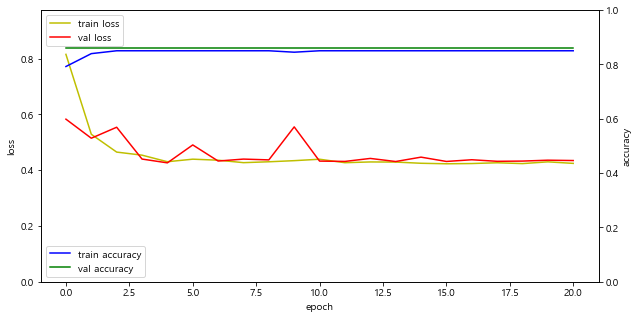

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.9740]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.43425939311372475 /정확도: 85.10638475418091 %


In [17]:
model.save('./Overfit.h5')

(47, 17)


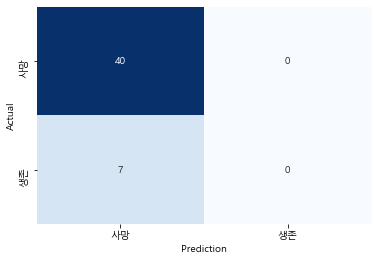

[[40  0]
 [ 7  0]]


<Figure size 432x288 with 0 Axes>

In [18]:
# 결과 - 혼동 행렬
print(x_test.shape)
y_test_pred = model.predict_classes(x_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sb.heatmap(c_matrix, annot=True, 
                 xticklabels=['사망', '생존'], 
                 yticklabels=['사망', '생존'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()
print(c_matrix)

# [[490   0]
#  [ 12 148]]
# [[사망자 맞춘 갯수   사망자 틀린 갯수]
#  [생존자 틀린 갯수   생존자 맞춘갯수]]

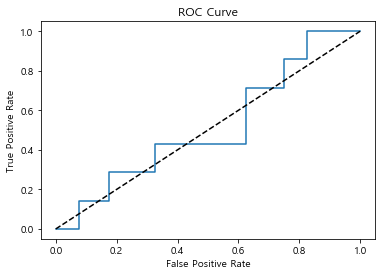

<Figure size 432x288 with 0 Axes>

In [19]:
# 결과 - ROC 곡선
y_test_pred_probs = model.predict(x_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()